In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
#データインポート
df_prj = pd.read_csv("../1_data/ks-projects-201801.csv")
display(df_prj.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
#統計量算出
df_prj.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [4]:
#欠損値確認
df_prj.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
#usd pledgedをゼロ埋め
df_prj['usd pledged'] = df_prj['usd pledged'].fillna('0')
df_prj.isnull().sum()

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [6]:
#stateを数値化
df_prj['state'] = df_prj['state'].map({'failed': 0, 'successful': 1})
df_prj.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0.0,0,GB,0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0.0,15,US,100,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0.0,3,US,220,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0.0,1,US,1,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,NaN,14,US,1283,1283.0,19500.00


In [7]:
#カテゴリーを数値化
df_ctg = pd.get_dummies(df_prj,columns=['category','main_category','currency','country'])
df_ctg.head(3)

,ID,name,deadline,goal,launched,pledged,state,backers,usd pledged,usd_pledged_real,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1000002330,The Songs of Adelaide & Abullah,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0.0,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0.0,15,100,2421.0,...,0,0,0,0,0,0,0,0,0,1
2,1000004038,Where is Hank?,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0.0,3,220,220.0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#散布図
pd.plotting.scatter_matrix(df_ctg, figsize=(10,10))
plt.show()

In [8]:
# 相関係数確認
df_ctg.corr()

,ID,goal,pledged,state,backers,usd_pledged_real,usd_goal_real,category_3D Printing,category_Academic,category_Accessories,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
ID,1.000000,0.001679,0.000466,-0.000722,0.000654,-0.000025,0.001854,0.000036,0.001294,-0.000874,...,0.000858,-0.001708,-0.000034,0.001281,-0.000250,0.001327,0.000236,-0.001336,-0.000291,0.001639
goal,0.001679,1.000000,0.007358,-0.025099,0.004012,0.005104,0.942692,-0.000046,0.000338,-0.002336,...,0.015872,-0.000201,0.013334,-0.003714,0.003295,0.018475,-0.000803,0.016824,-0.000896,-0.007864
pledged,0.000466,0.007358,1.000000,0.109507,0.717079,0.952843,0.005024,0.027340,-0.003008,-0.001555,...,0.034112,-0.000414,0.012054,-0.007008,-0.000544,0.009770,-0.001441,0.039414,0.001967,-0.000247
state,-0.000722,-0.025099,0.109507,1.000000,0.125790,0.108298,-0.023735,0.001872,-0.015991,-0.002283,...,-0.001689,-0.001885,-0.016415,0.004931,-0.025805,-0.010726,-0.006610,-0.009172,-0.000891,0.056250
backers,0.000654,0.004012,0.717079,0.125790,1.000000,0.752539,0.004517,0.005944,-0.003496,-0.002502,...,-0.000647,-0.000795,-0.006100,-0.011717,-0.002507,-0.003273,-0.002380,-0.000695,0.000863,0.015168
usd_pledged_real,-0.000025,0.005104,0.952843,0.108298,0.752539,1.000000,0.005596,0.026758,-0.003339,-0.002556,...,-0.000696,-0.000211,-0.005750,-0.006758,0.001093,-0.002517,-0.002487,-0.001068,0.000622,0.012392
usd_goal_real,0.001854,0.942692,0.005024,-0.023735,0.004517,0.005596,1.000000,0.000043,0.000388,-0.002450,...,-0.000257,-0.000130,-0.001809,-0.003523,0.004853,0.000825,-0.001068,-0.000264,-0.000996,-0.002271
category_3D Printing,0.000036,-0.000046,0.027340,0.001872,0.005944,0.026758,0.000043,1.000000,-0.002093,-0.003903,...,-0.000437,0.009185,0.000770,-0.003654,0.015669,0.001042,0.002411,-0.001071,0.001625,-0.017945
category_Academic,0.001294,0.000338,-0.003008,-0.015991,-0.003496,-0.003339,0.000388,-0.002093,1.000000,-0.004521,...,-0.000506,0.003571,0.007733,-0.004956,0.003139,0.004091,-0.001307,0.007712,-0.000481,-0.011531
category_Accessories,-0.000874,-0.002336,-0.001555,-0.002283,-0.002502,-0.002556,-0.002450,-0.003903,-0.004521,1.000000,...,0.004701,0.001092,0.000152,-0.008366,0.005363,0.004756,0.004187,0.009951,0.019230,-0.031283


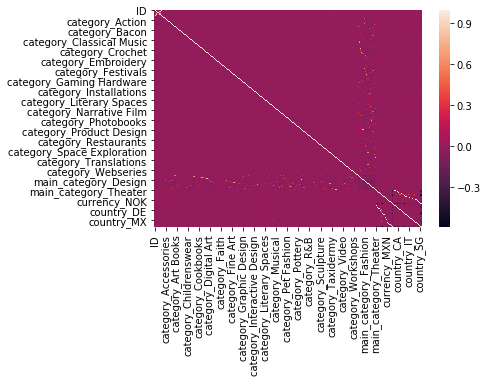

In [13]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_ctg.corr())
plt.show()

In [29]:
#予測

#不要な説明変数を省く
drop_col = ['state', 'ID','deadline','launched','name']

y = df_ctg["state"].values
X = df_ctg.drop(drop_col,axis=1).values

print(X)

clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print("w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}".format(w0, w1, w2))

[[1000.0 0.0 0 ... 0 0 0]
 [30000.0 2421.0 15 ... 0 0 1]
 [45000.0 220.0 3 ... 0 0 1]
 ...
 [15000.0 20.0 1 ... 0 0 1]
 [15000.0 200.0 6 ... 0 0 1]
 [2000.0 524.0 17 ... 0 0 1]]


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

In [ ]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['成功', '失敗'], 
                        columns=['成功', '失敗'])
conf_mat